In [112]:
import pandas as pd
import os

# Set the path to your folder
folder_path = 'Data/Raw Data/Frankfurter_Allee'

# Load each CSV into a dictionary of DataFrames
data_files = {
    'Accelerometer': pd.read_csv(os.path.join(folder_path, 'Accelerometer.csv')),
    'AccelerometerUncalibrated': pd.read_csv(os.path.join(folder_path, 'AccelerometerUncalibrated.csv')),
    
    'Gravity': pd.read_csv(os.path.join(folder_path, 'Gravity.csv')),
    'Gyroscope': pd.read_csv(os.path.join(folder_path, 'Gyroscope.csv')),
    'GyroscopeUncalibrated': pd.read_csv(os.path.join(folder_path, 'GyroscopeUncalibrated.csv')),
    'Location': pd.read_csv(os.path.join(folder_path, 'Location.csv')),
   
    'Orientation': pd.read_csv(os.path.join(folder_path, 'Orientation.csv')),
    'TotalAcceleration': pd.read_csv(os.path.join(folder_path, 'TotalAcceleration.csv'))
}

# Check the first few rows of each DataFrame to understand their structure
for key, df in data_files.items():
    print(f"Preview of {key}:")
    print(df.head(), "\n")


Preview of Accelerometer:
                  time  seconds_elapsed      z      y      x
0  1728723036068985600         0.145986 -1.287 -0.562  0.296
1  1728723036078591500         0.155592 -1.287 -0.562  0.296
2  1728723036088197400         0.165197 -1.014 -0.371  0.163
3  1728723036097803800         0.174804  2.538  0.949 -0.289
4  1728723036107410200         0.184410 -1.015 -0.381  0.145 

Preview of AccelerometerUncalibrated:
                  time  seconds_elapsed         z        y        x
0  1728723036112213200         0.189213  11.14605  4.21995 -2.01300
1  1728723036121819100         0.198819   6.89100  3.99000 -0.29100
2  1728723036131425000         0.208425   5.96700  3.63405 -0.26505
3  1728723036141031000         0.218031   5.71995  3.35100 -0.68595
4  1728723036150636500         0.227636   5.73495  4.01205 -0.92400 

Preview of Gravity:
                  time  seconds_elapsed      z      y      x
0  1728723036078591500         0.155592  8.792  3.640 -2.366
1  1728723036088

In [113]:
# Display summary statistics for each loaded dataset
for key, df in data_files.items():
    print(f"Summary for {key}:")
    print(df.describe(), "\n")


Summary for Accelerometer:
               time  seconds_elapsed            z            y            x
count  8.274000e+03      8274.000000  8274.000000  8274.000000  8274.000000
mean   1.728723e+18        39.881703     0.025029    -0.042385    -0.029459
std    2.294564e+10        22.945636     0.455014     0.380576     0.470886
min    1.728723e+18         0.145986    -4.752000    -4.762000    -6.979000
25%    1.728723e+18        20.013774    -0.111000    -0.106000    -0.108000
50%    1.728723e+18        39.881721     0.026000    -0.004000     0.000000
75%    1.728723e+18        59.749629     0.157000     0.083000     0.110000
max    1.728723e+18        79.617417     8.689000     2.580000     3.154000 

Summary for AccelerometerUncalibrated:
               time  seconds_elapsed            z            y            x
count  8.266000e+03      8266.000000  8266.000000  8266.000000  8266.000000
mean   1.728723e+18        39.913498     9.788243    -0.477714    -0.070635
std    2.293837e+10 

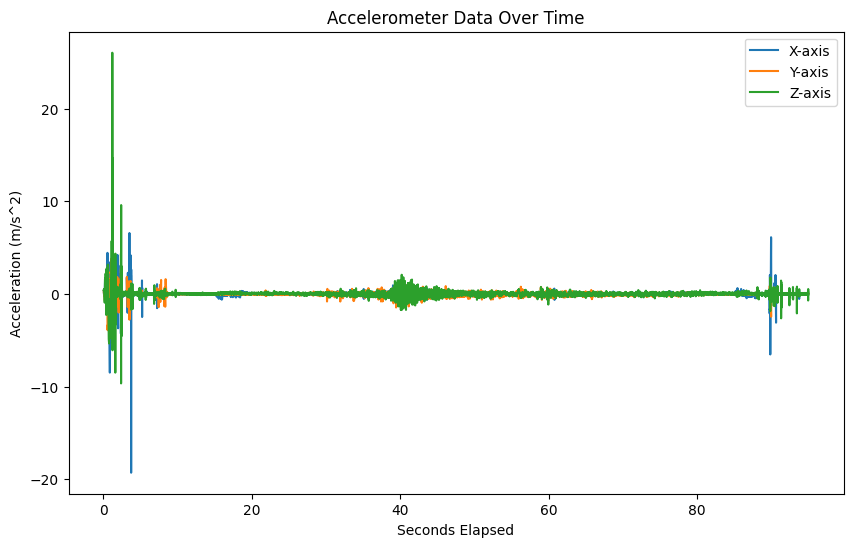

In [114]:
# Plot accelerometer data using 'seconds_elapsed' to visualize patterns over time
plt.figure(figsize=(10, 6))
plt.plot(accel_data['seconds_elapsed'], accel_data['x'], label='X-axis')
plt.plot(accel_data['seconds_elapsed'], accel_data['y'], label='Y-axis')
plt.plot(accel_data['seconds_elapsed'], accel_data['z'], label='Z-axis')

plt.title('Accelerometer Data Over Time')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()



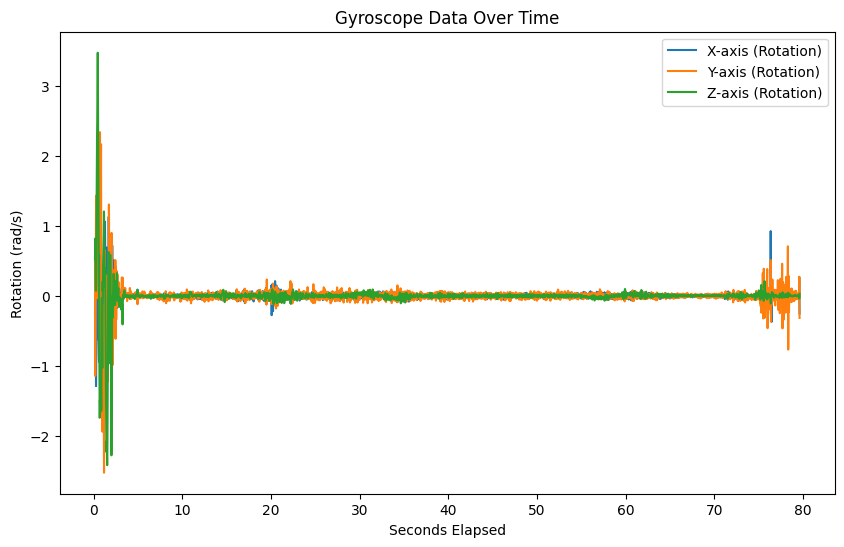

In [115]:
# Extract gyroscope data and plot it over time using 'seconds_elapsed'
gyro_data = data_files['Gyroscope']

plt.figure(figsize=(10, 6))
plt.plot(gyro_data['seconds_elapsed'], gyro_data['x'], label='X-axis (Rotation)')
plt.plot(gyro_data['seconds_elapsed'], gyro_data['y'], label='Y-axis (Rotation)')
plt.plot(gyro_data['seconds_elapsed'], gyro_data['z'], label='Z-axis (Rotation)')

plt.title('Gyroscope Data Over Time')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Rotation (rad/s)')
plt.legend()
plt.show()


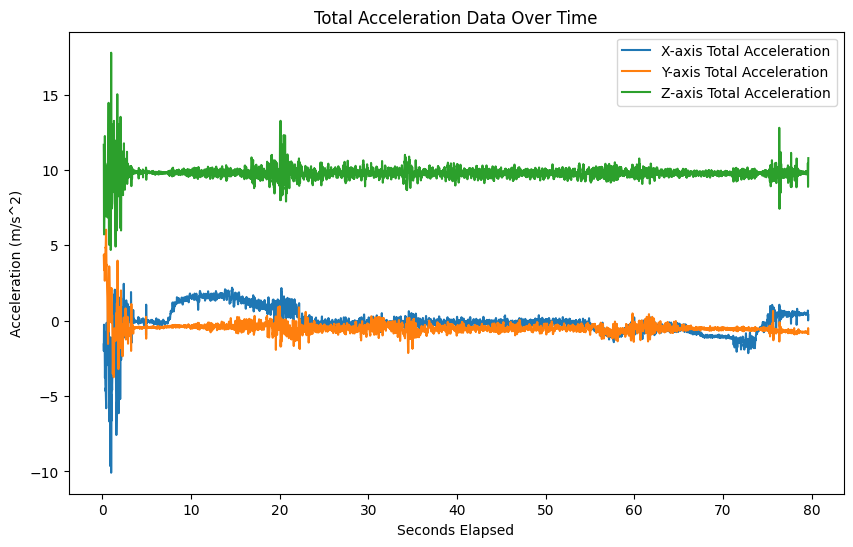

In [116]:
# Extract total acceleration data and plot it over time using 'seconds_elapsed'
total_accel_data = data_files['TotalAcceleration']

plt.figure(figsize=(10, 6))
plt.plot(total_accel_data['seconds_elapsed'], total_accel_data['x'], label='X-axis Total Acceleration')
plt.plot(total_accel_data['seconds_elapsed'], total_accel_data['y'], label='Y-axis Total Acceleration')
plt.plot(total_accel_data['seconds_elapsed'], total_accel_data['z'], label='Z-axis Total Acceleration')

plt.title('Total Acceleration Data Over Time')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()


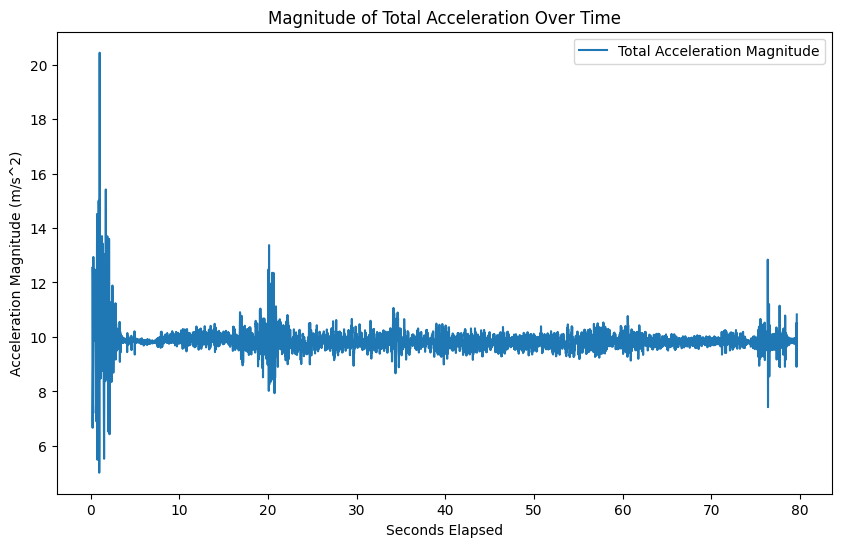

In [117]:
import numpy as np

# Calculate the magnitude of total acceleration
total_accel_data['magnitude'] = np.sqrt(total_accel_data['x']**2 + total_accel_data['y']**2 + total_accel_data['z']**2)

# Plot the magnitude of total acceleration over time
plt.figure(figsize=(10, 6))
plt.plot(total_accel_data['seconds_elapsed'], total_accel_data['magnitude'], label='Total Acceleration Magnitude')

plt.title('Magnitude of Total Acceleration Over Time')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Acceleration Magnitude (m/s^2)')
plt.legend()
plt.show()


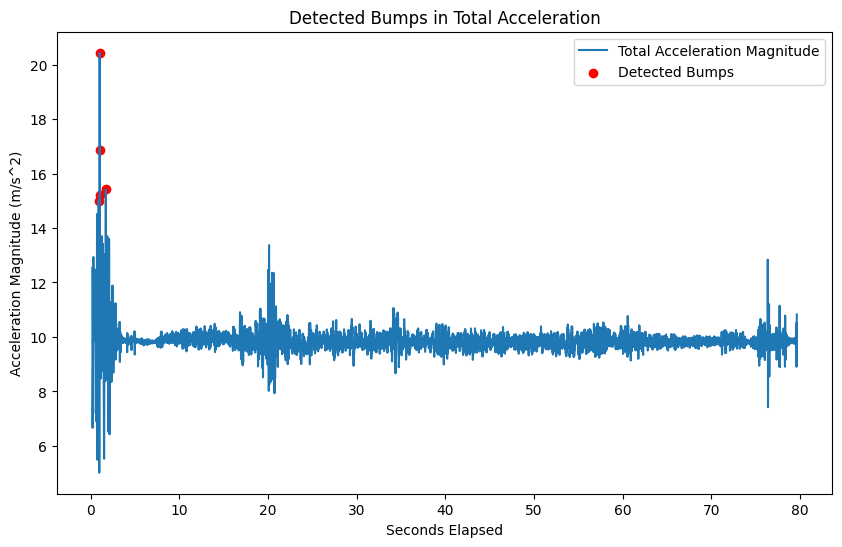

Bumps detected at: [0.90004834 1.00571338 1.01531934 1.02492529 1.70694629]


In [118]:
# Set a threshold to detect significant spikes (bumps)
threshold = 15  # Adjust this value depending on your data

# Detect points where the magnitude exceeds the threshold
bumps = total_accel_data[total_accel_data['magnitude'] > threshold]

# Plot the total acceleration magnitude with detected bumps highlighted
plt.figure(figsize=(10, 6))
plt.plot(total_accel_data['seconds_elapsed'], total_accel_data['magnitude'], label='Total Acceleration Magnitude')

# Highlight the bumps
plt.scatter(bumps['seconds_elapsed'], bumps['magnitude'], color='red', label='Detected Bumps')

plt.title('Detected Bumps in Total Acceleration')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Acceleration Magnitude (m/s^2)')
plt.legend()
plt.show()

# Print the times where bumps occurred
print(f"Bumps detected at: {bumps['seconds_elapsed'].values}")


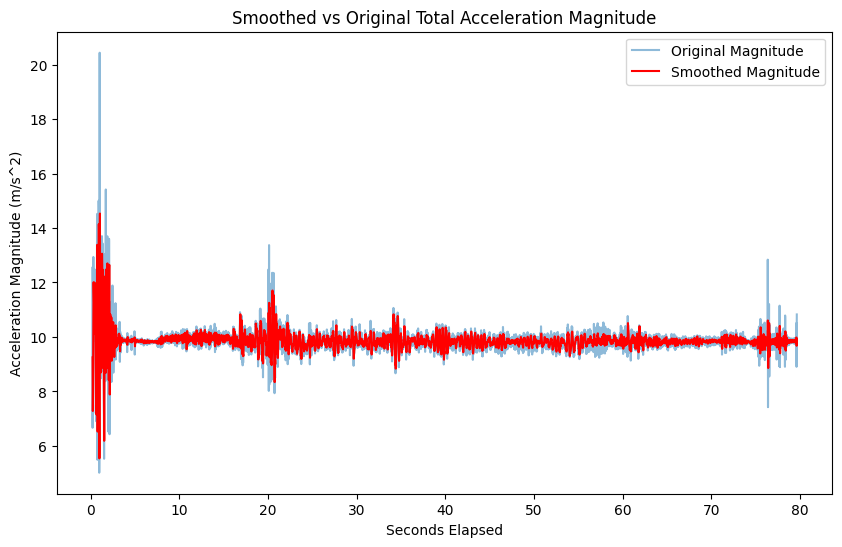

In [119]:
# Apply a rolling mean to smooth the data (window size can be adjusted)
window_size = 5  # Adjust this value depending on the data
total_accel_data['smoothed_magnitude'] = total_accel_data['magnitude'].rolling(window=window_size).mean()

# Plot the smoothed data along with the original for comparison
plt.figure(figsize=(10, 6))
plt.plot(total_accel_data['seconds_elapsed'], total_accel_data['magnitude'], label='Original Magnitude', alpha=0.5)
plt.plot(total_accel_data['seconds_elapsed'], total_accel_data['smoothed_magnitude'], label='Smoothed Magnitude', color='red')

plt.title('Smoothed vs Original Total Acceleration Magnitude')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Acceleration Magnitude (m/s^2)')
plt.legend()
plt.show()


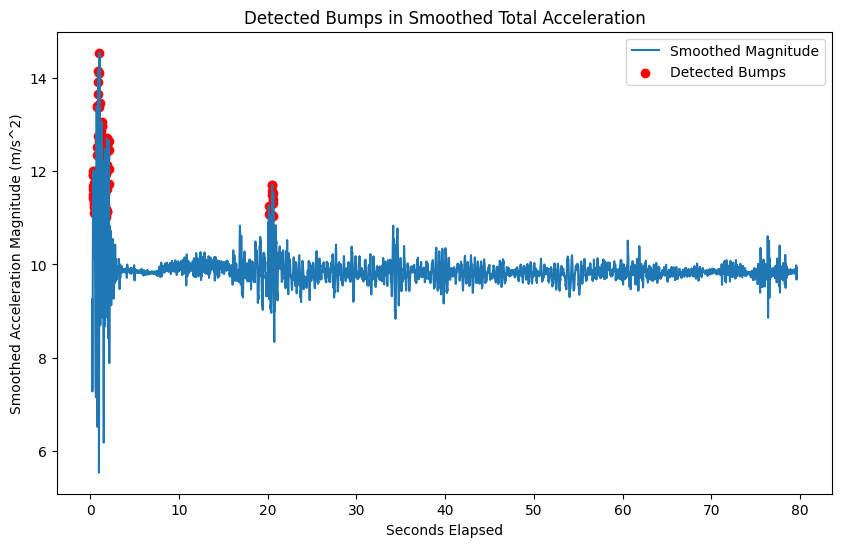

Bumps detected at: [ 0.31408936  0.32369531  0.33330127  0.34290723  0.35251294  0.36211865
  0.37172461  0.38133057  0.39093628  0.41975415  0.42936011  0.43896582
  0.44857178  0.45817749  0.46778345  0.70793042  0.71753638  0.72714258
  0.73674829  0.74635425  0.89044263  0.90004834  0.9096543   0.91926025
  0.92886621  0.93847217  1.01531934  1.02492529  1.03453125  1.04413696
  1.05374292  1.06334888  1.22664941  1.23625562  1.24586133  1.25546729
  1.26507324  1.2746792   1.28428491  1.29389087  1.30349683  1.31310303
  1.32270874  1.3323147   1.34192065  1.35152637  1.36113257  1.37073828
  1.58206909  1.59167505  1.60128076  1.61088696  1.62049292  1.70694629
  1.71655249  1.7261582   1.73576392  1.74537012  1.75497607  1.77418774
  1.85103564  1.8606416   1.87024756  1.87985352  1.88945947  1.89906543
  1.90867163  1.91827734  2.08157886  2.09118481  2.10079077  2.11039673
 20.12664575 20.1362522  20.21310132 20.48207422 20.49168042 20.50128638
 20.51089258 20.52049878 20.5301

In [121]:
# Set a threshold to detect significant spikes (bumps) in the smoothed data
threshold = 11  # Adjust this value depending on your data

# Detect points where the smoothed magnitude exceeds the threshold
bumps_smoothed = total_accel_data[total_accel_data['smoothed_magnitude'] > threshold]

# Plot the smoothed magnitude with detected bumps highlighted
plt.figure(figsize=(10, 6))
plt.plot(total_accel_data['seconds_elapsed'], total_accel_data['smoothed_magnitude'], label='Smoothed Magnitude')

# Highlight the bumps
plt.scatter(bumps_smoothed['seconds_elapsed'], bumps_smoothed['smoothed_magnitude'], color='red', label='Detected Bumps')

plt.title('Detected Bumps in Smoothed Total Acceleration')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Smoothed Acceleration Magnitude (m/s^2)')
plt.legend()
plt.show()

# Print the times where bumps occurred
print(f"Bumps detected at: {bumps_smoothed['seconds_elapsed'].values}")


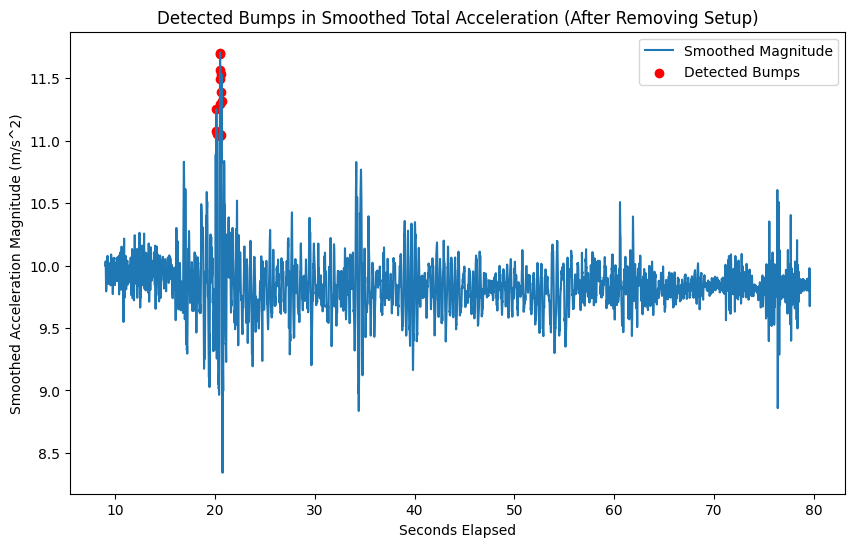

Bumps detected at: [20.12664575 20.1362522  20.21310132 20.48207422 20.49168042 20.50128638
 20.51089258 20.52049878 20.53010498 20.53971094 20.62616675 20.63577295
 20.64537915 20.65498535]


In [127]:
# Define the time after which we want to start analyzing (e.g., skip first 10 seconds)
start_time = 9  # Adjust this based on when you believe the ride started

# Filter the data to exclude the initial setup period
filtered_data = total_accel_data[total_accel_data['seconds_elapsed'] > start_time]

# Detect bumps in the filtered smoothed data
bumps_filtered = filtered_data[filtered_data['smoothed_magnitude'] > threshold]

# Plot the smoothed magnitude with detected bumps (after removing setup period)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['seconds_elapsed'], filtered_data['smoothed_magnitude'], label='Smoothed Magnitude')

# Highlight the bumps
plt.scatter(bumps_filtered['seconds_elapsed'], bumps_filtered['smoothed_magnitude'], color='red', label='Detected Bumps')

plt.title('Detected Bumps in Smoothed Total Acceleration (After Removing Setup)')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Smoothed Acceleration Magnitude (m/s^2)')
plt.legend()
plt.show()

# Print the times where bumps occurred after filtering
print(f"Bumps detected at: {bumps_filtered['seconds_elapsed'].values}")


In [129]:
import folium

# Load the location data
location_data = data_files['Location']

# Merge the bump data with the location data based on the closest time match
# We'll use a simple nearest merge for this purpose
bumps_filtered = bumps_filtered.copy()
bumps_filtered['closest_location_index'] = bumps_filtered['seconds_elapsed'].apply(
    lambda x: (location_data['seconds_elapsed'] - x).abs().idxmin()
)

# Extract the corresponding location data for each detected bump
bump_locations = location_data.loc[bumps_filtered['closest_location_index']]

# Create a map centered around the median location
center_lat = bump_locations['latitude'].median()
center_long = bump_locations['longitude'].median()
mymap = folium.Map(location=[center_lat, center_long], zoom_start=14)

# Add markers for the detected bumps
for idx, row in bump_locations.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Bump at {row['seconds_elapsed']} seconds",
        icon=folium.Icon(color='red')
    ).add_to(mymap)

# Display the map
mymap
